# Статистический анализ судейства в хастле

In [1]:
import scripts.pipeline as pipeline
import scripts.analisys as analisys
import scripts.model_preparation as model_preparation
import scripts.model as model
import scripts.model_interpretation as model_interpretation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

## Анализ результатов

#### Загрузим данные по крестам

In [3]:
raw_crosses = pipeline.get_raw_crosses('dataset/crosses.csv')
raw_crosses.head()

/home/aklyukvin/go/src/github.com/Sovianum/hustleScrape/dataanalisys/scripts/pipeline.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.passed[df.passed == 0] = -1


,competitor_id,competition_id,judge_name,category,phase,passed
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1
4,10486,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1


In [4]:
raw_crosses.competition_id.unique()

array(['NORD CUP 2020_2020-03-13', "Rock'n'Dance CUP 2020_2020-03-22",
       'Free your mind_2020-07-04', 'Кубок Лета_2020-08-08',
       'SIBERIAN JAM_2020-09-19',
       'Открытие Сезона 2020-2021, г. Москва_2020-09-27',
       'MusicUp_2020-10-03', 'Чемпионат Екатеринбурга 2020_2020-10-03',
       'H&D Cup_2020-10-16',
       'Открытый турнир для Е+D классов._2020-10-25',
       'Осенний кубок клуба "Движение"_2020-10-31',
       'Чемпионат Казани_2020-11-07', 'SNEG-i-RHYTHM_2020-12-06',
       'ЭТО НЕ ЧР 2020_2020-12-12', '"Jack and Jill Оnly"_2021-01-23',
       'So you think you can Dance_2021-02-06',
       'Это не ЧС - 2020_2021-02-14', 'Самоцветы Урала 2021_2021-02-22',
       'NORD CUP 2021_2021-03-12'], dtype=object)

In [5]:
# выдадим спортсменам синтетический инкрементные идентификаторы
# а также дадим уникальные турнирные идентификаторы

raw_crosses = pipeline.enrich_crosses_df(raw_crosses)

#### Загрузим данные по местам

In [6]:
raw_places = pipeline.get_raw_places('dataset/results.csv')
raw_places.head()

,competitor_id,category,competition_id,total_competitors,place_low,place_high,place
0,11220,dnd beginner,NORD CUP 2020_2020-03-13,52,1,1,1.0
1,8082,dnd beginner,NORD CUP 2020_2020-03-13,52,2,2,2.0
2,11190,dnd beginner,NORD CUP 2020_2020-03-13,52,3,3,3.0
3,10311,dnd beginner,NORD CUP 2020_2020-03-13,52,4,4,4.0
4,1650,dnd beginner,NORD CUP 2020_2020-03-13,52,5,5,5.0


#### Помержим места и кресты

In [7]:
results = pipeline.join_crosses_and_results(raw_crosses, raw_places)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Посмотрим, сколько оценок поставил каждый судья и получил каждый спортсмен

In [8]:
pipeline.get_judge_cross_counts(results)

катунин павел          4611
екатерина николаева    4437
лебедев сергей         4172
кудрявцев михаил       3924
мавлатов юрий          3385
волконский иван        3289
ирина кудрявцева       3192
дубровин игорь         3010
александр милованов    2564
андрей коньков         2105
арутюнян евгений       1998
александр иентш        1691
анастасия лукьянова    1666
вероника лебедева      1463
александр макарчук     1311
дутчак татьяна         1294
евгений корнеев         728
елена цветкова          650
александра луценко      509
ирина пузанова          477
алексей карпунин        400
роман самохвалов        336
алексей евдокимов       327
анна болотина           216
гиря дмитрий            164
александр резчиков      164
алексей северин         145
иван могучих            114
азиатцева ольга          90
степочкина яна           90
казакова олеся           90
гриненко никита          79
мария стрельченко        43
виталий ермаков          35
Name: judge_cross_counts, dtype: int64

#### Будем рассматривать только судей, которые поставили больше некоторого порога оценок

In [9]:
results = pipeline.remove_not_popular_judge_records(results, 1000)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также уберем всех спортсменов, у которых меньше 20 оценок 

In [10]:
results = pipeline.remove_not_popular_judge_records(results, 20)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,category_label,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,8,-1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также сделаем undersampling оценок всех судей

In [11]:
len(results)

44112

In [12]:
# results = pipeline.undersample_to_least_popular_judge(results)
# results.head()

In [13]:
len(results)

44112

### Первичный анализ

#### Посмотрим, кого судьи крестят, а кого - не крестят 

In [14]:
passed, not_passed = analisys.split_judge_crosses_df(analisys.get_judge_crosses_df(results))

#### Сначала кого крестят

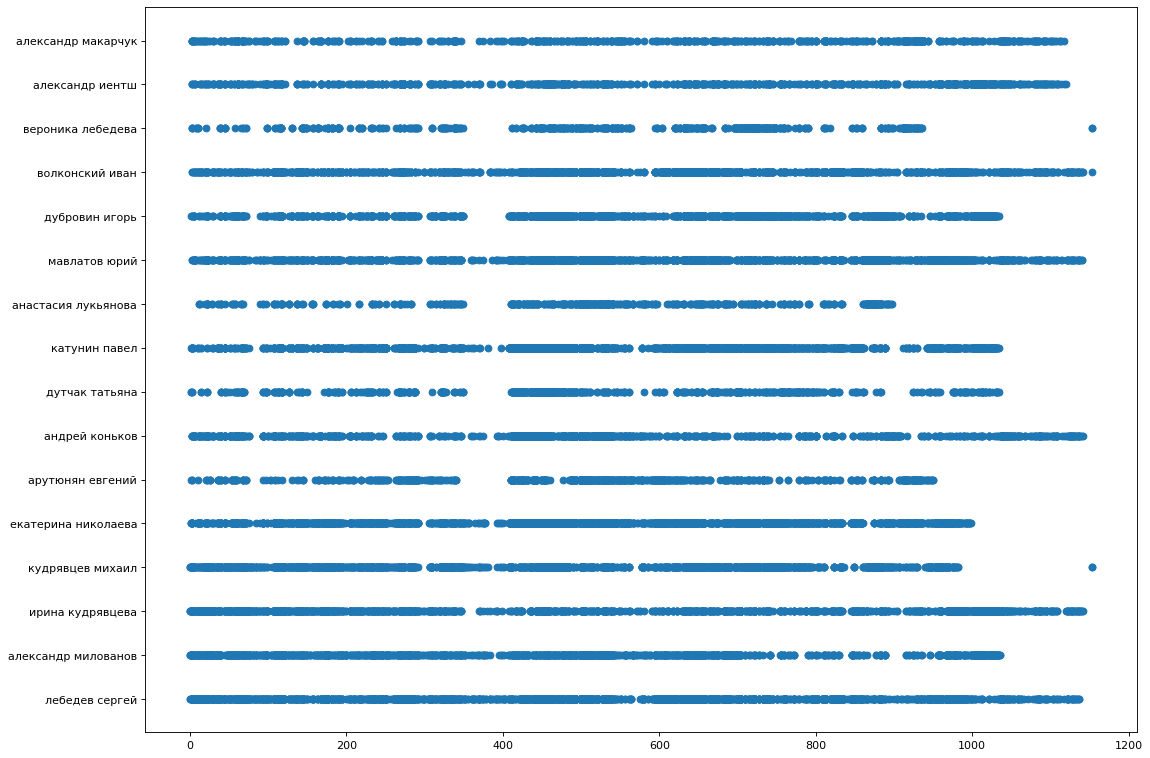

In [15]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(passed.syntethic_competitor_id, passed.judge_name)

#### Теперь кого не крестят

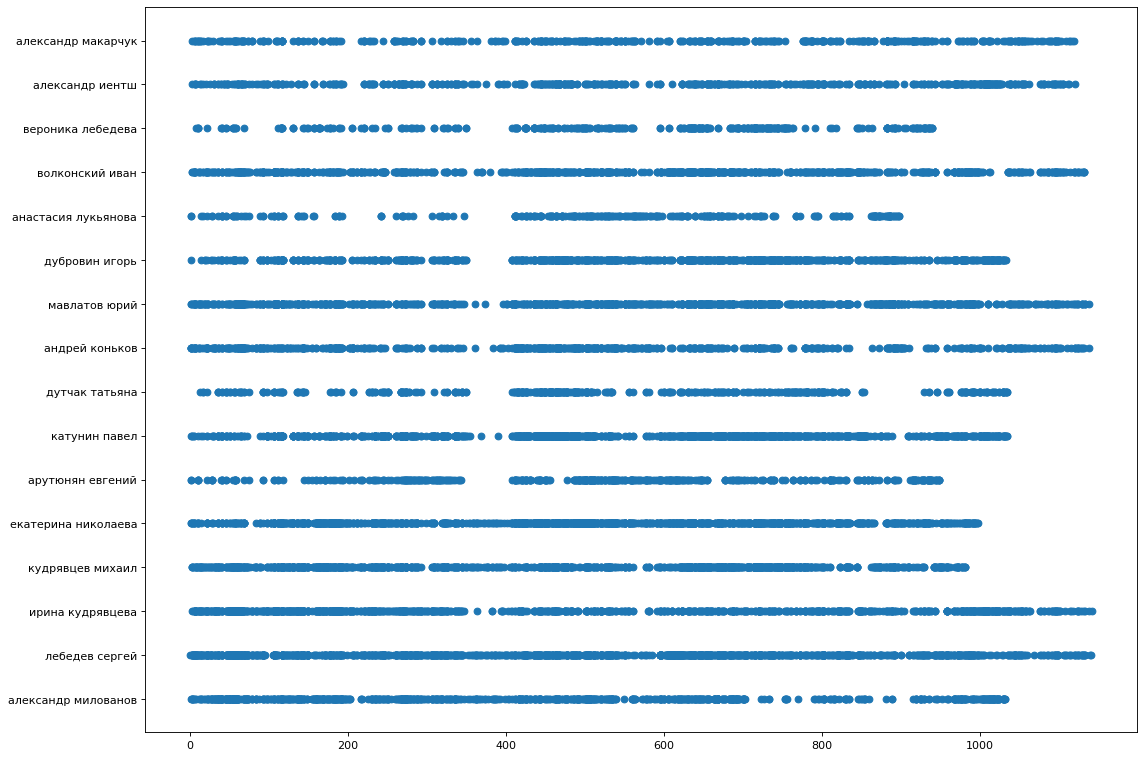

In [16]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(not_passed.syntethic_competitor_id, not_passed.judge_name)

## Построение модели

### Построим линейную регрессию количества крестов, полученных на турнире на отношение места участника к суммарному числу участников

#### Полный массив данных представляет собой таблицу, в которой каждая строка, в которой содержатся оценки всех судей по отношению к некоторому участнику за всю его номинацию, количество участников в этой номинации и итоговое место, которе занял участник в этой номинации

In [17]:
total_cross_based_data = model_preparation.get_total_cross_based_model_data(results) 
total_cross_based_data.head()

,волконский иван_-1,волконский иван_1,екатерина николаева_-1,екатерина николаева_1,катунин павел_-1,катунин павел_1,лебедев сергей_-1,лебедев сергей_1,дубровин игорь_-1,дубровин игорь_1,дутчак татьяна_-1,дутчак татьяна_1,кудрявцев михаил_-1,кудрявцев михаил_1,вероника лебедева_-1,вероника лебедева_1,александр милованов_-1,александр милованов_1,ирина кудрявцева_-1,ирина кудрявцева_1,арутюнян евгений_-1,арутюнян евгений_1,андрей коньков_-1,андрей коньков_1,мавлатов юрий_-1,мавлатов юрий_1,александр иентш_-1,александр иентш_1,александр макарчук_-1,александр макарчук_1,анастасия лукьянова_-1,анастасия лукьянова_1,total_competitors,place
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,22.5
1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,13.5
2,0,4,0,0,0,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,3.0
3,0,0,1,1,0,2,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,25.5
4,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,21.5


#### Полный массив данных представляет собой таблицу, в которой каждая строка, в которой содержатся суммы оценок всех судей по отношению к некоторому участнику за всю его номинацию, количество участников в этом турнире и итоговое место, которе занял данный участник

In [18]:
total_diff_based_data = model_preparation.get_total_diff_based_model_data(results)
total_diff_based_data.head()

,волконский иван,екатерина николаева,катунин павел,лебедев сергей,дубровин игорь,дутчак татьяна,кудрявцев михаил,вероника лебедева,александр милованов,ирина кудрявцева,арутюнян евгений,андрей коньков,мавлатов юрий,александр иентш,александр макарчук,анастасия лукьянова,total_competitors,place
0,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,25,22.5
1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,18,13.5
2,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,27,3.0
3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,49,25.5
4,0,1,1,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,25,21.5


#### Построим линейную регрессию на крестах

In [19]:
cross_based_regressor, cross_based_regressor_score = model.get_regression(total_cross_based_data)
diff_based_regressor, diff_based_regressor_score = model.get_regression(total_diff_based_data)

In [20]:
cross_based_regressor_score, diff_based_regressor_score

(0.7673469434417219, 0.687098379712861)

## Интерпретация построенной модели

### Сначала интерпретируем модель на крестах 

In [21]:
cross_based_coef_data = model_interpretation.get_model_coefs(
    cross_based_regressor, total_cross_based_data
).negate()

#### Построим нормированные коэффициенты модели 

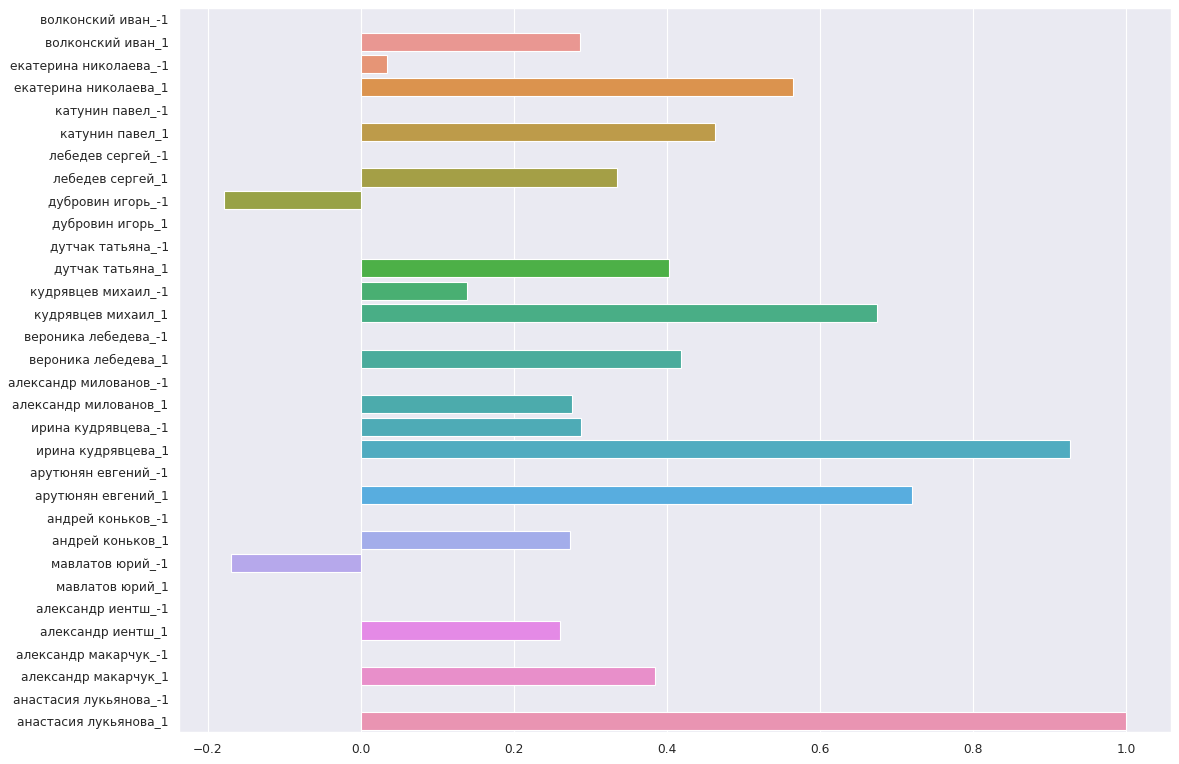

In [22]:
import seaborn as sns

sns.set()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x=cross_based_coef_data.norm_coefs, y=cross_based_coef_data.labels)

#### Построим разности нормированных коэффициентов модели

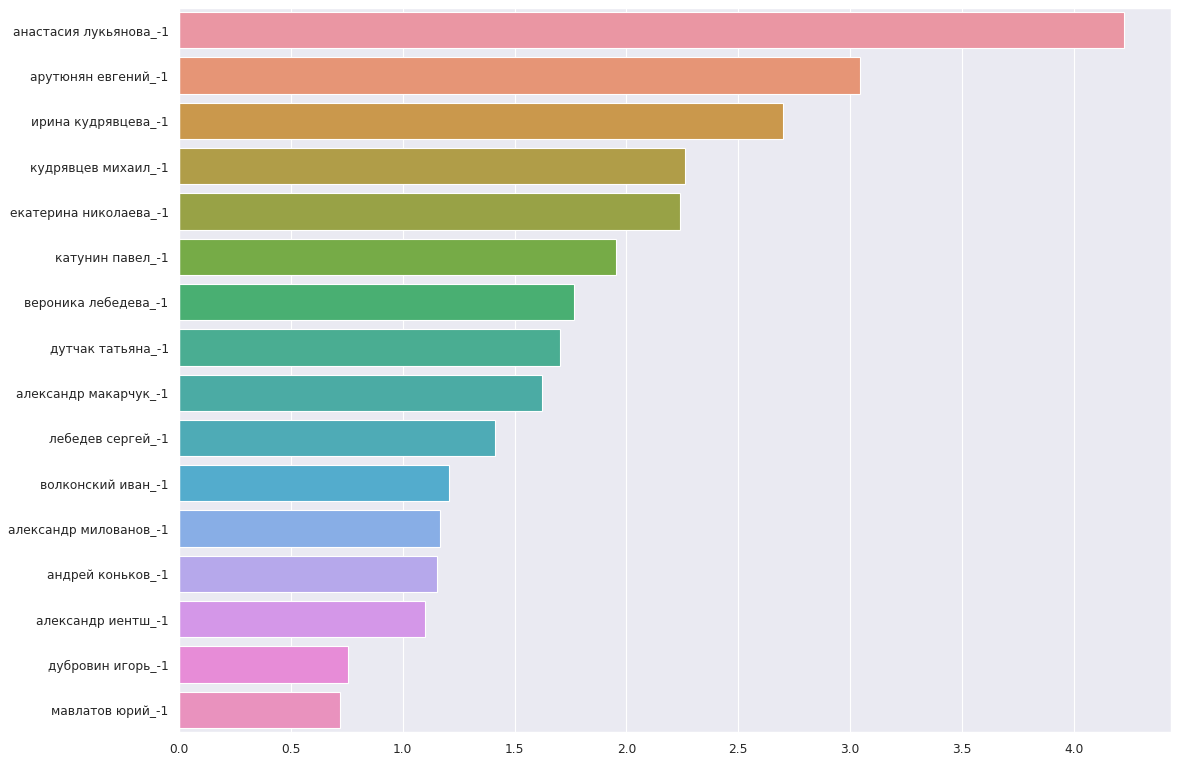

In [23]:
plt.figure(figsize=(16, 12), dpi=80)

cross_based_diff_coef_data = model_interpretation.get_diff_coef_data(cross_based_coef_data).negate().sort()

ax = sns.barplot(x=cross_based_diff_coef_data.coefs, y=cross_based_diff_coef_data.labels)

### Теперь интерпретируем модель на диффах 

In [24]:
diff_based_coef_data = model_interpretation.get_model_coefs(
    diff_based_regressor, total_diff_based_data
).negate().sort()

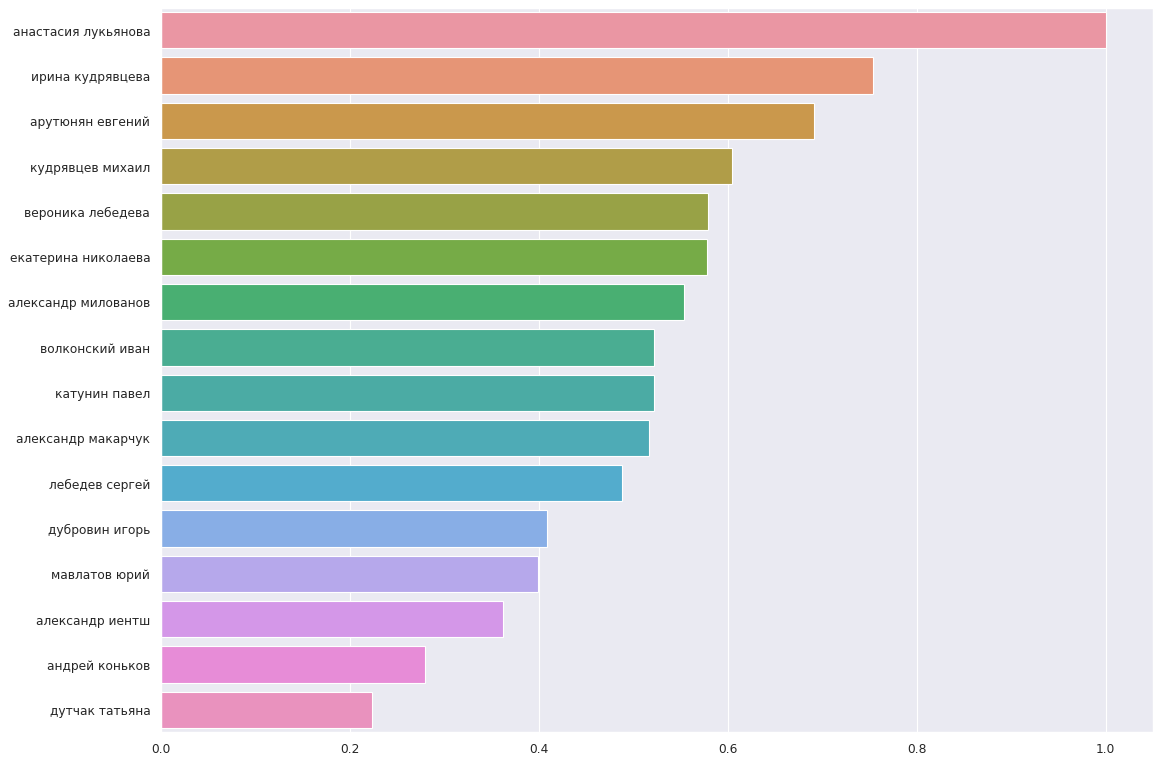

In [25]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x=diff_based_coef_data.norm_coefs, y=diff_based_coef_data.labels)